In [1]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


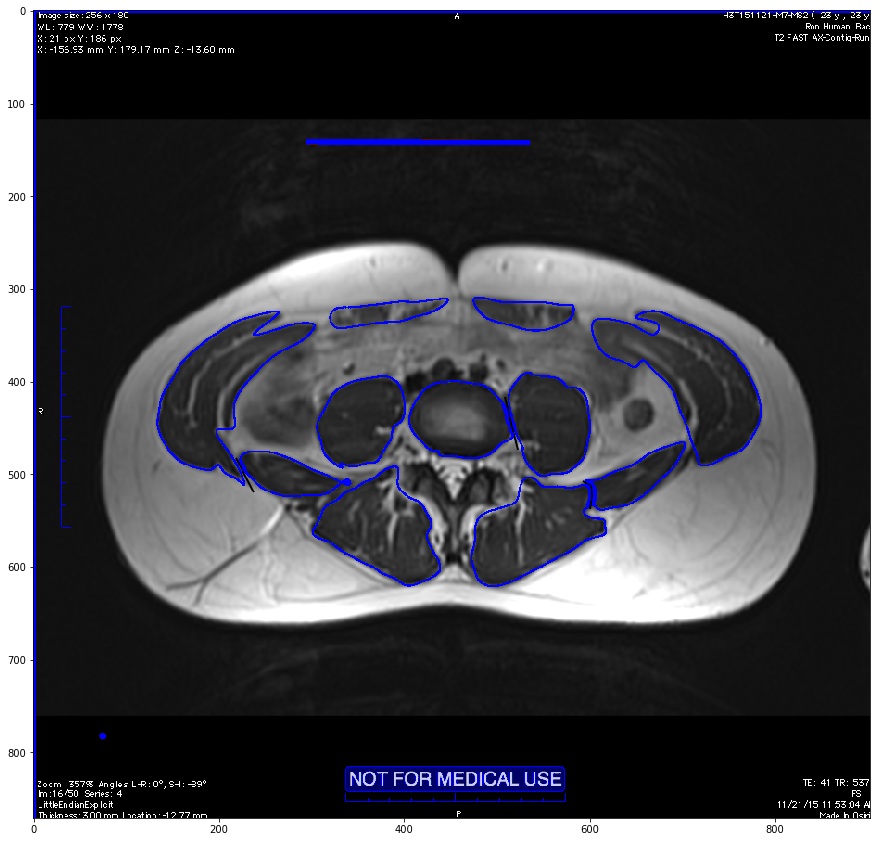

In [2]:
pylab.rcParams['figure.figsize'] = (15, 20)
imageName = "M007 Traced MRI MS.tif"
image=cv2.imread(imageName)
plt.imshow(image)

(871, 903, 3)


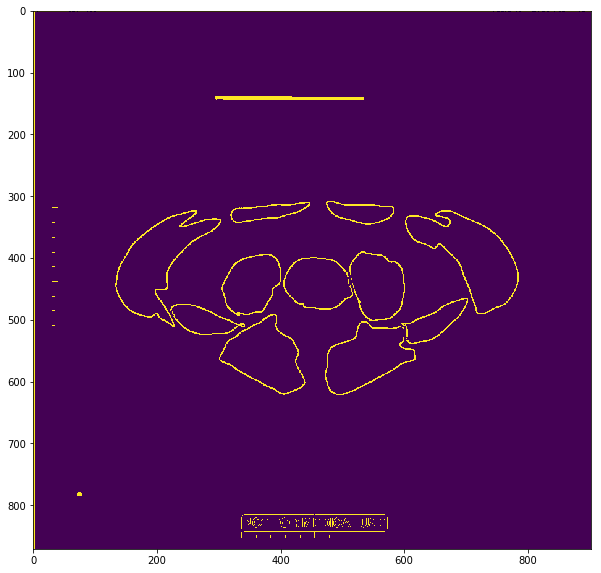

In [133]:
pylab.rcParams['figure.figsize'] = (10, 20)
lower_threshold = np.array([50, 70, 70])
upper_threshold = np.array([60, 70, 70])
h, w, d = image.shape
print(h, w, d)
ax = plt.subplot(1, 1, 1)
mask = np.ones((h, w), dtype='uint8')
mask *= image[:, :, 1] == 0
mask *= image[:, :, 2] == 255
ax.imshow(mask)

In [134]:
im2, contours, hierarchy = cv2.findContours(mask , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [135]:
good_cnt = []
means = []
tir = np.zeros_like(mask)
for cnt in contours:
    if len(cnt) < 30:
        continue
    #print(cnt.shape)
    mean = np.mean(cnt.reshape(-1, 2), axis=0).astype('uint32')
    print mean
    d = 5
    i_min = np.max([0, mean[0] - 5])
    i_max = np.min([h, mean[0] + 5])
    j_min = np.max([0, mean[1] - 5])
    j_max = np.min([w, mean[1] + 5])   
    surrounding = np.sum(tir[i_min:i_max, j_min:j_max])
    if surrounding == 1:
        print("Duplicate!!")
        continue
    if mean[0] < 50 or mean[1] < 20:
        continue
    tir[mean[0], mean[1]] = 1
    good_cnt.append(cnt)
    means.append(mean)
means = np.array(means)

[455 851]
[539 568]
[542 566]
Duplicate!!
[376 563]
[373 560]
Duplicate!!
[284 499]
[280 499]
Duplicate!!
[648 499]
[651 499]
Duplicate!!
[461 440]
[461 440]
Duplicate!!
[349 443]
[349 442]
Duplicate!!
[552 444]
[550 445]
Duplicate!!
[211 409]
[211 408]
Duplicate!!
[699 391]
[699 392]
Duplicate!!
[ 31 438]
[383 325]
[382 325]
Duplicate!!
[529 330]
[525 329]
Duplicate!!
[577  17]


In [136]:
img = np.ones_like(image)
img[:,:,0] *= 202
img[:,:,1] *= 225
img[:,:,2] *= 255
cv2.drawContours(img, good_cnt, -1, (0, 0, 0), 2)
pass

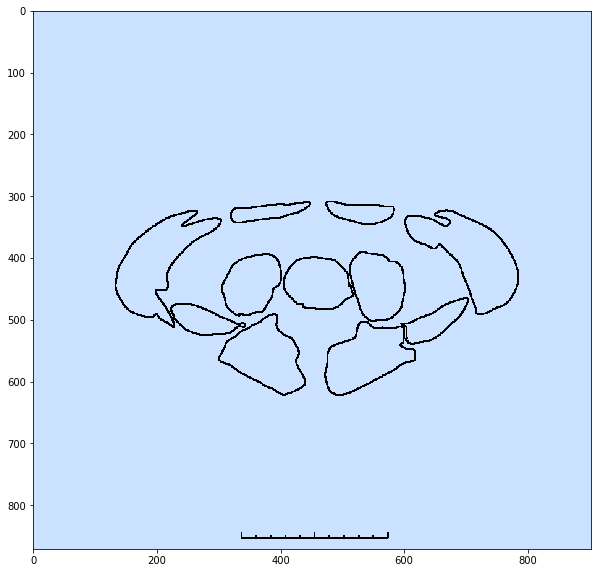

In [137]:
plt.imshow(img)

In [138]:
print((means))

[[455 851]
 [539 568]
 [376 563]
 [284 499]
 [648 499]
 [461 440]
 [349 443]
 [552 444]
 [211 409]
 [699 391]
 [383 325]
 [529 330]]


In [139]:
N = len(means)

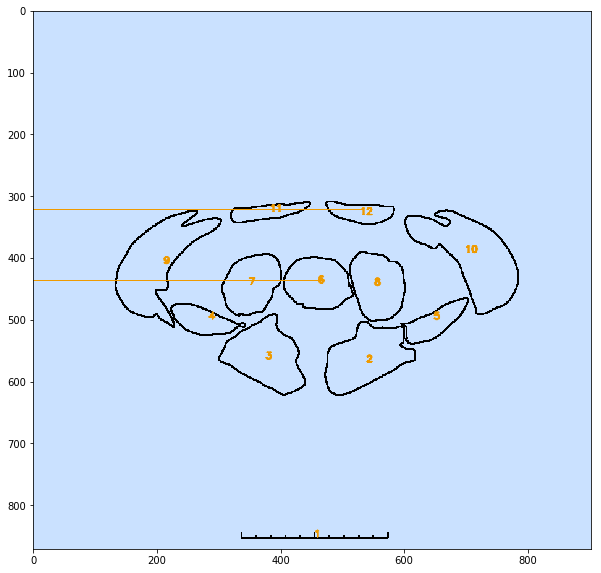

In [140]:
font = cv2.FONT_HERSHEY_SIMPLEX
count = 0
img2 = img * 1
for mean in means:
    count += 1
    cv2.putText(img2, "%d"%count ,(mean[0], mean[1]), font, .5,(238, 154, 0),2,cv2.LINE_AA)
plt.imshow(img2)

In [141]:
rec_x,rec_y,rec_w,rec_h = cv2.boundingRect(good_cnt[0])
cv2.rectangle(img,(rec_x,rec_y),(rec_x+rec_w,rec_y+rec_h),(0,255,0),2)
print(rec_x, rec_y, rec_w, rec_h)
scale = rec_w

(337, 844, 238, 10)


In [142]:
degree =45
degree_rad = degree * np.pi / 180.
a = -np.tan(degree_rad)
lp = means[5]

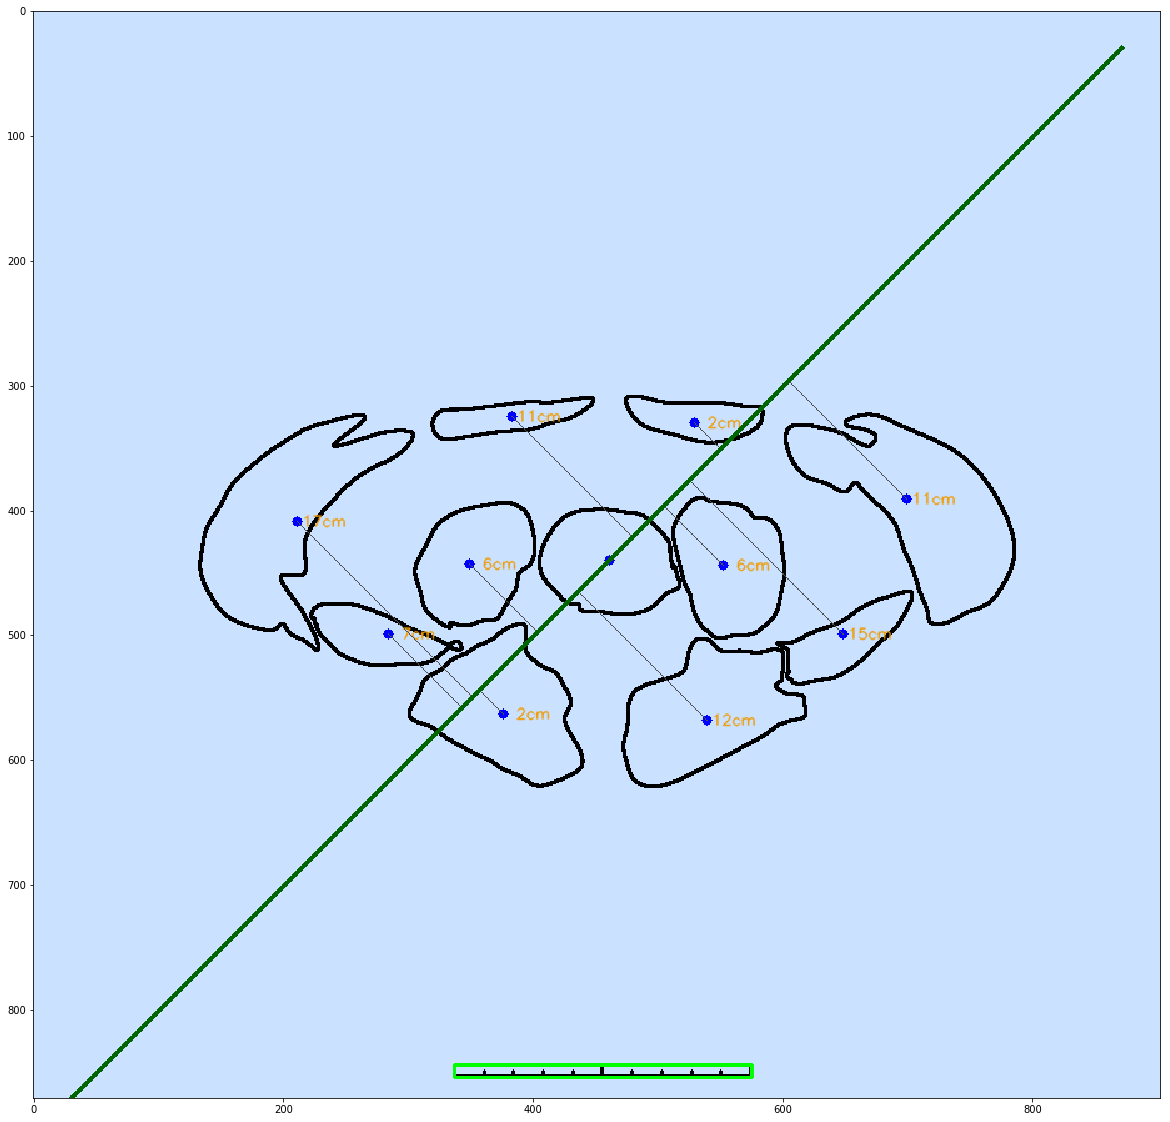

In [145]:
pylab.rcParams['figure.figsize'] = (30, 20)
img2 = img * 1
count = 0
for mean in means:
    count += 1
    if count == 1:
        continue
    center = (mean[0], mean[1])
    d, cross, l1, l2 = distance_of_point_from_line(mean, lp, a)
    cv2.circle(img2, center, 4, (0,0,255), -1)
    if d < 0.5:
        continue
    #print d
    d_in_cm = d / scale * 10
    cross = cross.astype('uint32')
    cv2.line(img2, center, (cross[0], cross[1]), (81, 81, 81),1)
    cv2.putText(img2, "%2.0fcm"%d_in_cm, (mean[0]+4, mean[1]+4), font, .4,(238,154,0),1,cv2.LINE_AA)
a, b = l1
beg = (0, int(b))
end = (h, int(a * h + b))
cv2.line(img2, beg, end, (0, 100, 0), 3)
plt.imshow(img2) 